In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **I. Install detectron2**

In [ ]:
%cd '/content/drive/MyDrive/CS114/Dien'

/content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/Dien


In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.9.0+cu102 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# !git clone https://github.com/facebookresearch/detectron2.git

In [ ]:
!python -m pip install -e detectron2

Obtaining file:///content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/Dien/detectron2
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.4.1
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
!assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version'
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


In [ ]:
# Remember restart your runtime prior to this, to let your installation take effect

# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import json
import tqdm
import random
import glob, os 
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.config import config as cfg
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog
from detectron2.structures import BoxMode
from detectron2.utils.video_visualizer import VideoVisualizer
from detectron2.utils.visualizer import ColorMode, Visualizer

## **II. Training**

In [ ]:
%cd '/content/drive/MyDrive/CS114/data_update/'

In [ ]:
# Download data
!gdown --id 1bZsQIdG3L6Puf_zOeKFblBF0UqoAs61j
!gdown --id 1-1oh6kiUwnRtHmVMGBgkvYyK1p1EBX7Z
!unzip data_final.zip
!unzip data_test.zip

#### **1. Create training datasets**

In [ ]:
%cd '/content/drive/MyDrive/CS114/data_update/data_final'
!ls |wc -l

/content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/data_update/data_final
8554


In [ ]:
train_dicts = get_data_dicts('/content/drive/MyDrive/CS114/data_update/data_final','/content/drive/MyDrive/CS114/data_update/data_final')

video13_1924.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1924.jpg file
video13_1925.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1925.jpg file
video13_1926.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1926.jpg file
video13_1927.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1927.jpg file
video13_1942.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1942.jpg file
video13_1959.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1959.jpg file
video13_1966.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1966.jpg file
video13_1970.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1970.jpg file
video13_1971.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1971.jpg file
video13_1988.txt
access /content/drive/MyDrive/CS114/data_update/data_final/video13_1988.jpg file
video13_1998.txt
acc

In [ ]:
len(train_dicts)

In [ ]:
%cd '/content/drive/MyDrive/CS114/Dien'

/content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/Dung


In [ ]:
with open('train_dicts.json', 'w') as fp:
     json.dump(train_dicts, fp)

In [ ]:
with open('/content/drive/MyDrive/CS114/Dien/train_dicts_new.json') as fp:
    train_dicts = json.load(fp)

In [ ]:
for i in range(len(train_dicts)):
    for j in range(len(train_dicts[i]["annotations"])):
        train_dicts[i]["annotations"][j]['bbox_mode'] = BoxMode.XYXY_ABS

In [ ]:
train_dicts[0]["annotations"]

[{'bbox': [708, 248, 740, 282],
  'bbox_mode': <BoxMode.XYXY_ABS: 0>,
  'category_id': 4,
  'iscrowd': 0}]

#### **2. Create test datasets**

In [ ]:
%cd '/content/drive/MyDrive/CS114/data_update_1/data_test'
!ls |wc -l

/content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/data_update_1/data_test
400


In [ ]:
test_dicts = get_data_dicts('/content/drive/MyDrive/CS114/data_update_1/data_test','/content/drive/MyDrive/CS114/data_update_1/data_test')

In [ ]:
len(test_dicts)

In [ ]:
%cd '/content/drive/MyDrive/CS114/Dien'

/content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/Dung


In [ ]:
with open('test_dicts.json', 'w') as fp:
     json.dump(test_dicts, fp)

In [ ]:
with open('/content/drive/MyDrive/CS114/Dien/val_dicts_new.json') as fp:
    test_dicts = json.load(fp)

In [ ]:
for i in range(len(test_dicts)):
    for j in range(len(test_dicts[i]["annotations"])):
        test_dicts[i]["annotations"][j]['bbox_mode'] = BoxMode.XYXY_ABS

In [ ]:
test_dicts[0]["annotations"]

[{'bbox': [1077, 406, 1110, 435],
  'bbox_mode': <BoxMode.XYXY_ABS: 0>,
  'category_id': 5,
  'iscrowd': 0}]

In [ ]:
classes = ['No entry','No parking / waiting','No turning','Max speed','Other prohibition signs','Warning','Mandatory','Indication','Other sign']

data = [train_dicts, test_dicts]

for index, d in enumerate(["train", "val"]):
    DatasetCatalog.register("traffic_sign_data/" + d, lambda index=index: data[index])
    MetadataCatalog.get("traffic_sign_data/" + d).set(thing_classes = classes)

traffic_sign_metadata = MetadataCatalog.get("traffic_sign_data/train")

In [ ]:
import random
import matplotlib.pyplot as plt

train = DatasetCatalog.get('traffic_sign_data/train')
print(len(train))

4277


#### **3. Training**

In [ ]:
%cd '/content/drive/MyDrive/CS114/Dien'

/content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/Dien


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

In [ ]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("traffic_sign_data/train",)
cfg.DATASETS.TEST = ("traffic_sign_data/val",)

cfg.DATALOADER.NUM_WORKERS = 4
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/CS114/Dien/model_5/model_final.pth'
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00001

cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 15000 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = []
cfg.SOLVER.GAMMA = 0.05

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 9 

cfg.TEST.EVAL_PERIOD = 500

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[08/07 10:48:20 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/07 10:48:23 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)

[08/07 10:48:43 d2.utils.events]:  eta: 4:11:52  iter: 19  total_loss: 0.2745  loss_cls: 0.05024  loss_box_reg: 0.1954  loss_rpn_cls: 0.0001359  loss_rpn_loc: 0.006802  time: 0.9810  data_time: 0.0272  lr: 1.9981e-07  max_mem: 6045M
[08/07 10:49:03 d2.utils.events]:  eta: 4:17:06  iter: 39  total_loss: 0.2319  loss_cls: 0.04023  loss_box_reg: 0.183  loss_rpn_cls: 4.494e-05  loss_rpn_loc: 0.004281  time: 0.9882  data_time: 0.0056  lr: 3.9961e-07  max_mem: 6045M
[08/07 10:49:23 d2.utils.events]:  eta: 4:17:08  iter: 59  total_loss: 0.2126  loss_cls: 0.03293  loss_box_reg: 0.1826  loss_rpn_cls: 2.083e-05  loss_rpn_loc: 0.002663  time: 0.9909  data_time: 0.0063  lr: 5.9941e-07  max_mem: 6045M
[08/07 10:49:42 d2.utils.events]:  eta: 4:16:47  iter: 79  total_loss: 0.2333  loss_cls: 0.03694  loss_box_reg: 0.1775  loss_rpn_cls: 9.13e-05  loss_rpn_loc: 0.003891  time: 0.9896  data_time: 0.0073  lr: 7.9921e-07  max_mem: 6045M
[08/07 10:50:02 d2.utils.events]:  eta: 4:16:19  iter: 99  total_loss:













































## **III. Evaluate model performance**

In [ ]:
%cd '/content/drive/MyDrive/CS114/Dien/output/'

/content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/Dien/output


In [ ]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("traffic_sign_data/val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "traffic_sign_data/val")
inference_on_dataset(trainer.model, val_loader, evaluator)

NameError: ignored

#### **1. Predict Image**

In [ ]:
%cd /content/drive/MyDrive/CS114/Dien

/content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/Dien


In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))

cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/CS114/Dien/output/model_final.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# cfg.DATASETS.TRAIN = ("traffic_sign_data/train",)
# cfg.DATASETS.TEST = ('traffic_sign_data/val',)
# cfg.DATALOADER.NUM_WORKERS = 4

# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.SOLVER.BASE_LR = 0.00001  # pick a good LR
# cfg.SOLVER.WARMUP_ITERS = 1000
# cfg.SOLVER.MAX_ITER = 20000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
# cfg.SOLVER.STEPS = []       # do not decay learning rate
# cfg.SOLVER.GAMMA = 0.05

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 9  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.
cfg.TEST.EVAL_PERIOD = 500

predictor = DefaultPredictor(cfg)

Runtime of video11_1042 is 0.24214482307434082


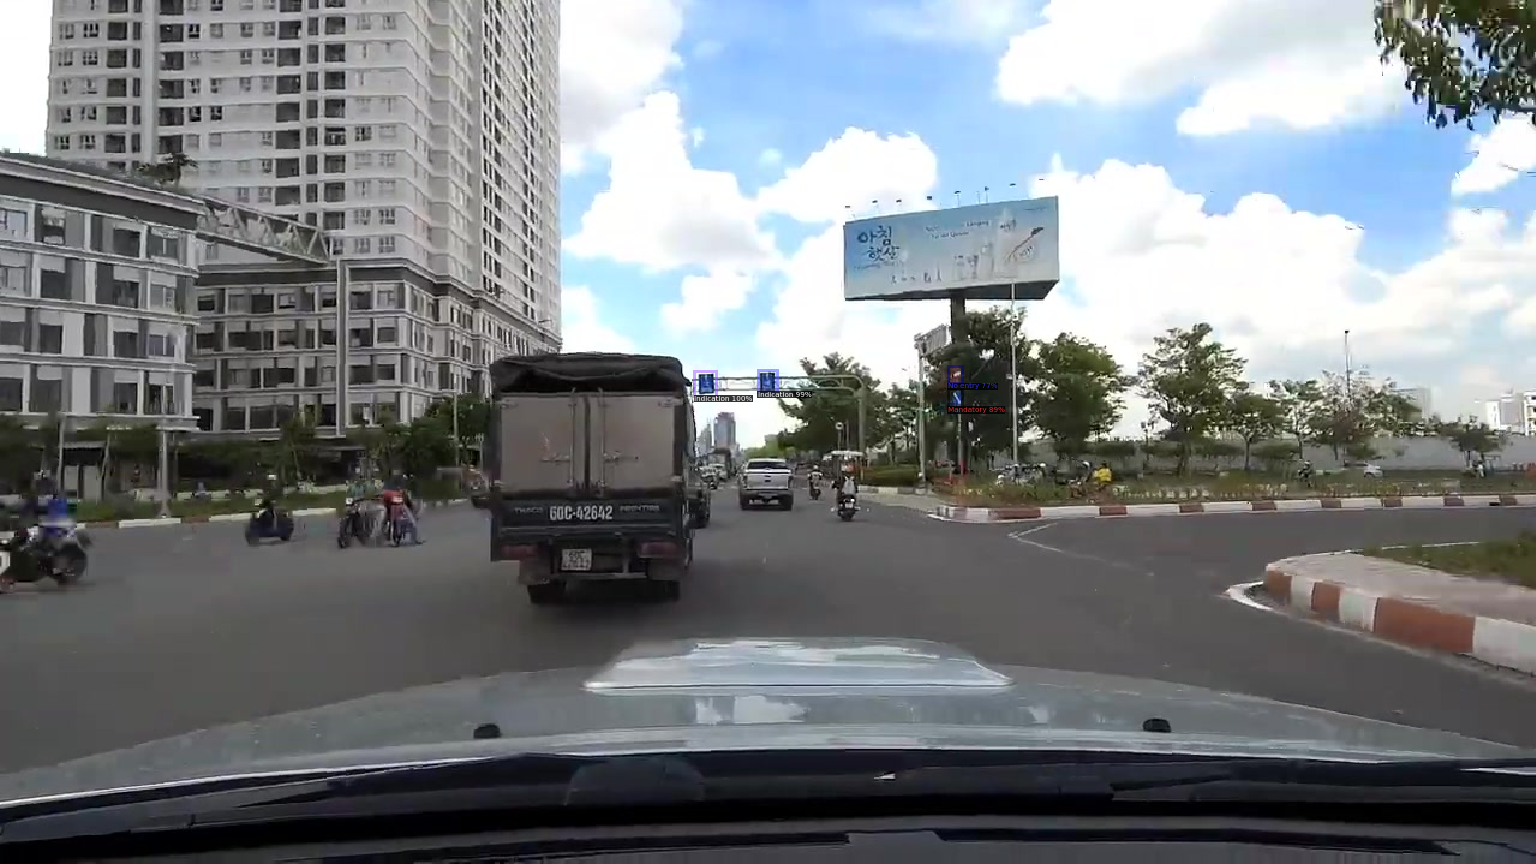

In [ ]:
import time
# for i, name in enumerate(test):
#     print(name[:-4])
im = cv2.imread('/content/drive/MyDrive/CS114/data_update/data_test/video11_1042.jpg')
start = time.time()
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

end = time.time()
print(f"Runtime of video11_1042 is {end - start}")
v = Visualizer(im[:, :, ::-1],
                metadata=traffic_sign_metadata,
                scale=1.2, 
              instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])
# cv2.imwrite('/content/drive/MyDrive/CS114/Bao-Cao/Predict/Image/video11_1042_faster.jpg', out.get_image()[:, :, ::-1])
    # if i == 10:
    #     break

#### **2. Predict Video**

In [ ]:
%cd /content/drive/MyDrive/CS114/Dien/Predict/Video

/content/drive/.shortcut-targets-by-id/1ar57-yjgthRYEyLux_DeH_CoOeuRRcmb/CS114/Dien/Predict/Video


In [ ]:
# Extract video properties
video = cv2.VideoCapture('/content/drive/MyDrive/CS114/Dien/video/tiktok.mp4')
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = video.get(cv2.CAP_PROP_FPS)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize video writer
video_writer = cv2.VideoWriter('tiktok.mp4', fourcc=cv2.VideoWriter_fourcc(*"mp4v"), fps=float(frames_per_second), frameSize=(width, height), isColor=True)

# # Initialize predictor
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))

cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/CS114/Dien/output/model_final.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# cfg.DATASETS.TRAIN = ("signs_data/train",)
# cfg.DATASETS.TEST = ('signs_data/val',)
# cfg.DATALOADER.NUM_WORKERS = 4

# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.SOLVER.BASE_LR = 0.00001  # pick a good LR
# cfg.SOLVER.WARMUP_ITERS = 1000
# cfg.SOLVER.MAX_ITER = 30000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
# cfg.SOLVER.STEPS = []       # do not decay learning rate
# cfg.SOLVER.GAMMA = 0.05

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 9  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.
# cfg.TEST.EVAL_PERIOD = 500
 
predictor = DefaultPredictor(cfg)

# Initialize visualizer
# v = VideoVisualizer(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), ColorMode.IMAGE)
v = VideoVisualizer(traffic_sign_metadata , ColorMode.IMAGE)

In [ ]:
import time

def runOnVideo(video, maxFrames):
    """ Runs the predictor on every frame in the video (unless maxFrames is given),
    and returns the frame with the predictions drawn.
    """

    readFrames = 0
    while True:
        hasFrame, frame = video.read()
        if not hasFrame:
            break

        # Get prediction results for this frame
        outputs = predictor(frame)

        # Make sure the frame is colored
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Draw a visualization of the predictions using the video visualizer
        visualization = v.draw_instance_predictions(frame, outputs["instances"].to("cpu"))

        # Convert Matplotlib RGB format to OpenCV BGR format
        visualization = cv2.cvtColor(visualization.get_image(), cv2.COLOR_RGB2BGR)

        yield visualization

        readFrames += 1
        if readFrames > maxFrames:
            break

# Create a cut-off for debugging
start = time.time()
num_frames = 2000

# Enumerate the frames of the video
for visualization in tqdm.tqdm(runOnVideo(video, num_frames), total=num_frames):

    # Write test image
    cv2.imwrite('tiktok.png', visualization)

    # Write to video file
    video_writer.write(visualization)

end = time.time()
print(f"Runtime of the program is {end - start}")

# Release resources
video.release()
video_writer.release()
cv2.destroyAllWindows()


  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
 30%|███   

Runtime of the program is 192.6674633026123
